In [5]:
n=int(input())
arr=list(map(int,input().split()))

10
25 4 8 44 88 11 42 16 80 55


In [6]:
arr=[25,4,8,44,88,11,42,16,80,55]

In [7]:
n=10

# Sorting

### Bubble Sort

In [22]:
#bubble sort time complexity best case is O(n) worst case is O(n**2)
def bubble_sort(array,limit):
    for i in range(limit-1):
        for j in range(0,limit-i-1):
            if array[j+1]<array[j]:
                array[j],array[j+1]=array[j+1],array[j]
    return array

In [23]:
print(bubble_sort(arr,n))

[4, 8, 11, 16, 25, 42, 44, 55, 80, 88]


### Selection Sort

In [36]:
#time complexity is best O(n**2) worst is O(n**2)
def selection_sort(array,limit):
    for i in range(limit):
        index=i
        for j in range(i+1,limit):
            if array[index]>array[j]:
                index=j
        array[i],array[index] = array[index],array[i]
    return array

In [37]:
print(selection_sort(arr,n))

[4, 8, 11, 16, 25, 42, 44, 55, 80, 88]


### Insertion Sort

In [45]:
#time complexity is best O(n) worst is O(n**2)
def insertion_sort(array,limit):
    for i in range(1,limit):
        temp=array[i]
        j=i-1
        while j>=0 and temp <array[j]:
            array[j+1]=array[j]
            j-=1
        array[j+1]=temp
    return array

In [46]:
print(insertion_sort(arr,n))

[4, 8, 11, 16, 25, 42, 44, 55, 80, 88]


### Merge Sort

In [51]:
#time complexity O(nlogn) 
def mergeSort(array):
    if len(array)>1:
        middle=len(array)//2
        L=array[:middle]
        R=array[middle:]
        mergeSort(L)
        mergeSort(R)
        
        i=j=k=0
        while(i<len(L) and j<len(R)):
            if L[i]<R[j]:
                array[k]=L[i]
                i+=1
            else:
                array[k]=R[j]
                j+=1
            k+=1
        array[k:]=L[i:]
        array+=R[j:]
    return array

In [54]:
mergeSort(arr)

[4, 8, 11, 16, 25, 42, 44, 55, 80, 88]

### Quick Sort

In [26]:
'''time complexity is O(nlogn) and worst case O(n**2)'''

def partition(array,lb,ub):
    pivot=array[lb]
    start=lb
    end=ub
    while(start<end):
        while(array[start]<=pivot and start<ub):
            start+=1
        while(array[end]>pivot and end>lb):
            end-=1
        if(start<end):
            array[start],array[end]=array[end],array[start]
    array[lb],array[end]=array[end],array[lb]
    return end

def quicksort(array,lb,ub):
    if(lb<ub):
        loc=partition(array,lb,ub)
        quicksort(array,lb,loc-1)
        quicksort(array,loc+1,ub)
    return array

In [27]:
quicksort([7,30,11,80,68,47,99,10,0,15,12,7],0,11)

[0, 7, 7, 10, 11, 12, 15, 30, 47, 68, 80, 99]

# Searching

### Binary Search

In [18]:
'''time complexity O(log2N)'''
def binary_search(array,l,r,key):
    if(r>=l):
        middle=(l+r)//2
        if(array[middle]==key):
            return middle
        elif(array[middle]<key):
            return binary_search(array,middle+1,r,key)
        else:
            return binary_search(array,l,middle-1,key)
    else:
        return -1

In [30]:
quicksort(arr,0,n-1)
binary_search(arr,0,len(arr)-1,88)

9

### Ternary Search

In [23]:
'''time complexity O(log3N)'''
def ternary_search(array,l,r,key):
    if(r>=l):
        middle_1=l+(r-l)//3
        middle_2=r-(r-l)//3
        
        if(array[middle_1]==key):
            return middle_1
        if(array[middle_2]==key):
            return middle_2

        if(key<array[middle_1]):
            return ternary_search(array,l,middle_1-1,key)
        elif(key>array[middle_2]):
            return ternary_search(array,middle_2+1,r,key)
        else:
            return ternary_search(array,middle_1+1,middle_2-1,key)
    else:
        return -1

In [33]:
quicksort(arr,0,n-1)
ternary_search(arr,0,len(arr)-1,88)

0

# Greedy Method

### Fractional Knapsack

In [23]:
def sorting(i):
    return i[2]
def fractional_knapsack(wt,value,max_wt):
    ratio=[x/y for x,y in zip(value,wt)]
    k=zip(wt,value,ratio)
    k=sorted(k,key=sorting,reverse=True)
    length=len(ratio)
    filled=0
    i=0
    profit=0
    while(filled<max_wt and i<length):
        alloted=max_wt-filled
        if(alloted>=k[i][0]):
            filled+=k[i][0]
            profit+=k[i][1]
        else:
            filled+=alloted
            profit+=(alloted*k[i][2])
        i+=1
    print(profit)

In [24]:
wt=[10, 40, 20, 30]
value=[60, 40, 100, 120]
capacity=50
fractional_knapsack(wt,value,capacity)

240.0


### Job Sequencing

In [23]:
def sorting(i):
    return i[1]
def job_sequencing(job,profit,deadline):
    seq_array=[0]*max(deadline)
    k=zip(job,profit,deadline)
    k=sorted(k,key=sorting,reverse=True)
    profit_attain=0
    for i in range(len(profit)):
        dead=k[i][2]-1
        while(seq_array[dead]!=0 and dead!=-1):
            dead-=1
        if(dead!=-1):
            seq_array[dead]=1
            profit_attain+=k[i][1]
        else:
            continue      
    print(profit_attain)

In [29]:
job=['a','b','c','d','e','f','g']
profit=[35,15,12,5,6,1,2]
deadline=[10,4,2,1,4,3,9]
job_sequencing(job,profit,deadline)

75


### Dijkstra's Algorithm - Matrix

In [19]:
import sys
class Graph:
    def __init__(self,vertex,size):
        self.matrix=[[0 for i in range(size)] for j in range(size)]
        self.vertex=vertex
        self.size=size
        
        
    def return_index(self,name):
        return self.vertex.index(name)
    
    def return_list(self):
        return self.vertex

    def add_weight(self,array):
        for i in array:
            x=self.return_index(i[0])
            y=self.return_index(i[1])
            weight=int(i[2])
            self.matrix[x][y]=weight
            #self.matrix[y][x]=weight if undirected graph, remove the hash tag 
        
    def print_matrix(self):
        print(self.matrix)
        
    
    def dijkstra(self,start,end):
        index=self.return_index(start)
        end=self.return_index(end)
        if(index==end):
            print(0)
            return
        array=[sys.maxsize]*self.size
        fixed=[]
        fixed.append(index)
        array[index]=0
        while(True):
            length=array[index]
            for i in range(self.size):
                if i in fixed:
                    continue
                min_length=length+self.matrix[index][i]
                if(self.matrix[index][i]!=0 and min_length<array[i]):
                    array[i]=min_length
            index=array.index(min(array[j] for j in range(self.size) if j not in fixed))
            if(index in fixed):
                min_value=min(array[j] for j in range(self.size) if j not in fixed)
                for k in range(self.size):
                    if min_value==array[k] and k not in fixed:
                        index=k
                        break
            fixed.append(index)
            if(index==end):
                print(array[index] if array[index]!=sys.maxsize else -1)
                break


N=int(input())
list_data=[]
array=[]
for i in range(N):
    input_value=input().split()
    try:
        list_data.index(input_value[0])
    except:
        list_data.append(input_value[0])
    try:
        list_data.index(input_value[1])
    except:
        list_data.append(input_value[1])
    array.append(input_value)
g=Graph(list_data,len(list_data))
g.add_weight(array)
K=int(input())
for i in range(K):
    start,end=input().split()
    g.dijkstra(start,end)

9
C B 10
B D 15
D C 11
D E 6
E F 9
F A 14
A B 7
F C 2
A C 9
2
A E
28
B C
26


### Dijkstra's Algorithm - List

In [39]:
import sys
class Graph:
    def __init__(self,no_vertices):
        self.vertices=no_vertices
        self.d={}
        self.distance=[]
        self.graph={}
        
    def add_vertices(self,vertices):
        for i in range(self.vertices):
            self.d[vertices[i]] = i + 1
        self.graph = {i + 1: [] for i in range(self.vertices)}
        self.distance = [[sys.maxsize] * (self.vertices + 1) for _ in range(self.vertices + 1)]
        
    def add_edges(self,array,size):
        for i in array:
            x = self.d[i[0]]
            y = self.d[i[1]]
            weight=int(i[2])
            self.distance[x][y] = weight
            #self.distance[y][x] = weight if undirected, remove the hash tag
       
    def dijkstra(self):
        for i in range(self.vertices+1):
            self.distance[i][i] = 0
        for k in range(1, self.vertices + 1):
            for i in range(1, self.vertices + 1):
                for j in range(1, self.vertices + 1):
                    if self.distance[i][j] > self.distance[i][k] + self.distance[k][j]:
                        self.distance[i][j] = self.distance[i][k] + self.distance[k][j]     
        
    def find_distance(self,i):
        x = self.d[i[0]]
        y = self.d[i[1]]
        print(self.distance[x][y])
        
N,M=input().split()
g=Graph(int(N))
vertices=list(input().split())
g.add_vertices(vertices)
edges=[] 
for i in range(int(M)):
    edges.append(input().split())
g.add_edges(edges,int(M))
g.dijkstra()
K=int(input())
for i in range(K):
    g.find_distance(input().split())

4 4
Howrah Trivandram Vashi Mysore
Howrah Trivandram 10
Howrah Vashi 20
Trivandram Mysore 100
Mysore Vashi 50
6
Howrah Trivandram
10
Howrah Vashi
20
Howrah Mysore
70
Trivandram Vashi
30
Trivandram Mysore
80
Mysore Vashi
50


### Minimum Cost Path - Matrix

In [40]:
def minimum_cost_path(matrix,x,y):
    minimum_cost_array=[[0 for i in range(y+1)]for j in range(x+1)]
    minimum_cost_array[0][0]=matrix[0][0]
    if(x==y):
        for i in range(1,x+1):
            minimum_cost_array[i][0]=minimum_cost_array[i-1][0]+matrix[i][0]
            minimum_cost_array[0][i]=minimum_cost_array[0][i-1]+matrix[0][i]
    else:
        for i in range(1,x+1):
            minimum_cost_array[i][0]=minimum_cost_array[i-1][0]+matrix[i][0]
        for i in range(1,y+1):
            minimum_cost_array[0][i]=minimum_cost_array[0][i-1]+matrix[0][i]
            
    for i in range(1,x+1):
        for j in range(1,y+1):
            minimum_cost_array[i][j]=matrix[i][j]+min(minimum_cost_array[i-1][j],minimum_cost_array[i][j-1],minimum_cost_array[i-1][j-1])
    print(minimum_cost_array[x][y])
    
matrix=[[2,3,4],[5,9,8],[7,2,1]]

minimum_cost_path(matrix,0,2)

9


# Data Structure

### Queue

In [4]:
#Queue

'''
maxsize – Number of items allowed in the queue.
empty() – Return True if the queue is empty, False otherwise.
full() – Return True if there are maxsize items in the queue. If the queue was initialized with maxsize=0 (the default), then full() never returns True.
get() – Remove and return an item from the queue. If queue is empty, wait until an item is available.
get_nowait() – Return an item if one is immediately available, else raise QueueEmpty.
put(item) – Put an item into the queue. If the queue is full, wait until a free slot is available before adding the item.
put_nowait(item) – Put an item into the queue without blocking.
qsize() – Return the number of items in the queue. If no free slot is immediately available, raise QueueFull.

'''
from queue import Queue

queue=Queue(maxsize=3)
print(queue.qsize())

queue.put('a')
queue.put('b')
queue.put('c')

print(queue.get())

0
a


### Stack

In [6]:
#Stack

'''
maxsize – Number of items allowed in the queue.
empty() – Return True if the queue is empty, False otherwise.
full() – Return True if there are maxsize items in the queue. If the queue was initialized with maxsize=0 (the default), then full() never returns True.
get() – Remove and return an item from the queue. If queue is empty, wait until an item is available.
get_nowait() – Return an item if one is immediately available, else raise QueueEmpty.
put(item) – Put an item into the queue. If the queue is full, wait until a free slot is available before adding the item.
put_nowait(item) – Put an item into the queue without blocking.
qsize() – Return the number of items in the queue. If no free slot is immediately available, raise QueueFull.
'''

from queue import LifoQueue

stack=LifoQueue(maxsize=3)

stack.put('a')
stack.put('b')
stack.put('c')

print(stack.get())

c


### Hash Table

In [8]:
#Hash table

'''
In Python, the Dictionary data types represent the implementation of hash tables.
The Keys in the dictionary satisfy the following requirements.

Hashing is a function to create key
'''
hash_table = {'a':3,'b':4}
print(hash_table['a'])

3


### Linked List

In [1]:
#Linked List

class Node:
    def __init__(self,data):
        self.next=None
        self.data=data

class Linkedlist:
    def __init__(self,data):
        self.head=data
    
    def insert(self,node):
        temp=self.head
        for i in node:
            while(temp.next!=None):
                temp=temp.next
            temp.next=i
            
    def printLinkedList(self):
        temp=self.head
        while(temp):
            print(temp.data,end=' ')
            temp=temp.next
            
            
            
linked_list=Linkedlist(Node(6))
array=[7,8,9,7,10,11]
datas=[Node(i) for i in array]
linked_list.insert([i for i in datas])
linked_list.printLinkedList()

6 7 8 9 7 10 11 

### Binary Tree

In [6]:
#Binary Tree

class Node:
    def __init__(self,data):
        self.data=data
        self.left=None
        self.right=None
        
    def insert(self,data):
        if self.data:
            if data<self.data:
                if self.left is None:
                    self.left=Node(data)
                else:
                    self.left.insert(data)
            elif data>self.data:
                if self.right is None:
                    self.right=Node(data)
                else:
                    self.right.insert(data)
        else:
            self.data=data
        
    def DFS(self):
        if self.left:
            self.left.DFS()
        print(self.data,end=' ')
        if self.right:
            self.right.DFS()
    
    def BFS(self):
        queue=[]
        queue.append(self)
        while(queue):
            s=queue.pop(0)
            print(s.data,end=' ')
            if(s.left):
                queue.append(s.left)
            if(s.right):
                queue.append(s.right)
    
array=[4,77,8,1,2,3]
root=Node(36)
for i in array:
    root.insert(i)
root.DFS()
print()
root.BFS()

1 2 3 4 8 36 77 
36 4 77 1 8 2 3 

### Graph - Adjacency

In [83]:
from collections import defaultdict
class Graph:
    def __init__(self,size):
        self.adjacency_matrix=[[0 for i in range(size)] for j in range(size)]
        self.vertex={}
        self.index=0
    
    def add_vertex(self,name):
        if(name not in self.vertex):
            self.vertex[name]=self.index
            self.index+=1
        
    def return_index(self,name):
        return self.vertex[name]
    
    def return_dict(self):
        return self.vertex

    def add_weight(self,vertex_1,vertex_2,weight):
        self.add_vertex(vertex_1)
        self.add_vertex(vertex_2)
        self.adjacency_matrix[self.return_index(vertex_1)][self.return_index(vertex_2)]=weight
        
    def print_matrix(self):
        print(self.adjacency_matrix)
        
    
g=Graph(6)
#for i in ['A','B','C','D','E','F']:
#    g.add_vertex(i)
g.add_weight('A','B',6)
g.add_weight('C','E',12)
g.add_weight('A','C',11)
g.print_matrix()
print(g.return_dict())

[[0, 6, 11, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 12, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
{'A': 0, 'B': 1, 'C': 2, 'E': 3}


### Graph Visualization 

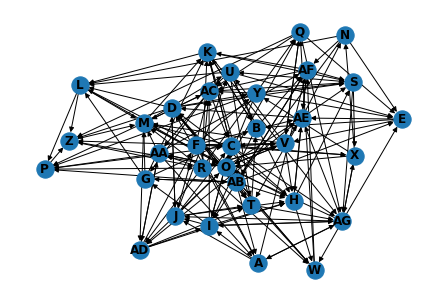

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()
#G.add_nodes_from(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG'])
weighted_edge=[('AG', 'AE', 1), ('U', 'B', 7), ('AD', 'H', 2), ('R', 'Q', 8), ('H', 'AE', 1), ('AF', 'K', 5), ('T', 'D', 3), ('B', 'K', 10), ('R', 'AD', 9), ('AE', 'T', 4), ('X', 'Y', 7), ('AB', 'P', 9), ('X', 'O', 4), ('W', 'AF', 1), ('I', 'G', 9), ('F', 'Y', 6), ('O', 'AD', 10), ('A', 'AF', 4), ('T', 'K', 5), ('M', 'K', 10), ('F', 'J', 10), ('M', 'H', 5), ('M', 'P', 10), ('D', 'Y', 6), ('AA', 'AF', 8), ('W', 'Q', 2), ('S', 'U', 10), ('AC', 'C', 6), ('C', 'H', 2), ('AF', 'S', 9), ('AB', 'E', 8), ('D', 'L', 7), ('K', 'S', 3), ('C', 'M', 7), ('T', 'B', 9), ('S', 'AG', 3), ('R', 'W', 7), ('AG', 'I', 4), ('O', 'D', 10), ('V', 'U', 4), ('P', 'C', 3), ('X', 'AG', 9), ('O', 'Q', 7), ('AE', 'N', 5), ('AA', 'M', 2), ('AF', 'I', 1), ('A', 'D', 3), ('AF', 'AE', 1), ('E', 'B', 2), ('AC', 'G', 9), ('U', 'H', 5), ('I', 'J', 1), ('V', 'R', 3), ('AC', 'M', 4), ('D', 'S', 6), ('Y', 'AC', 8), ('P', 'R', 4), ('Y', 'E', 9), ('Q', 'E', 3), ('F', 'AC', 1), ('U', 'L', 9), ('F', 'AE', 4), ('M', 'O', 7), ('N', 'E', 10), ('R', 'AC', 2), ('E', 'V', 3), ('V', 'C', 8), ('V', 'Q', 1), ('Q', 'V', 6), ('AB', 'H', 9), ('U', 'AC', 9), ('C', 'X', 7), ('W', 'O', 5), ('C', 'K', 4), ('L', 'M', 4), ('S', 'X', 5), ('AE', 'AD', 3), ('K', 'C', 8), ('Y', 'O', 6), ('V', 'M', 1), ('J', 'U', 2), ('AC', 'AA', 8), ('B', 'I', 7), ('Z', 'R', 10), ('O', 'V', 10), ('Q', 'AG', 2), ('F', 'X', 4), ('J', 'T', 3), ('AD', 'T', 7), ('AA', 'P', 6), ('Q', 'AC', 4), ('F', 'A', 8), ('R', 'M', 9), ('D', 'J', 5), ('M', 'U', 6), ('G', 'M', 1), ('AB', 'W', 2), ('A', 'J', 1), ('G', 'K', 3), ('AF', 'AC', 4), ('X', 'N', 3), ('D', 'T', 7), ('N', 'L', 2), ('D', 'Z', 10), ('AG', 'W', 7), ('Q', 'Z', 1), ('AB', 'D', 3), ('AA', 'AD', 5), ('L', 'Z', 3), ('B', 'AF', 10), ('P', 'Z', 10), ('N', 'AB', 2), ('A', 'I', 2), ('J', 'O', 7), ('T', 'O', 8), ('V', 'AE', 6), ('AG', 'J', 1), ('O', 'AE', 10), ('R', 'V', 3), ('C', 'I', 4), ('V', 'O', 3), ('AC', 'S', 10), ('U', 'E', 5), ('K', 'L', 7), ('I', 'AG', 5), ('L', 'P', 2), ('H', 'D', 8), ('A', 'AG', 3), ('J', 'H', 3), ('AB', 'G', 5), ('C', 'Z', 5), ('E', 'AE', 9), ('J', 'D', 4), ('F', 'L', 10), ('T', 'AG', 2), ('I', 'H', 1), ('G', 'B', 8), ('Y', 'S', 10), ('M', 'AC', 7), ('AG', 'E', 9), ('H', 'S', 5), ('K', 'AG', 4), ('AE', 'S', 6), ('F', 'V', 7), ('Z', 'M', 1), ('V', 'H', 6), ('AB', 'AF', 8), ('AG', 'X', 10), ('O', 'T', 2), ('O', 'AA', 10), ('I', 'C', 10), ('C', 'V', 2), ('AA', 'O', 3), ('G', 'L', 1), ('L', 'O', 7), ('AD', 'I', 3), ('AD', 'F', 5), ('AB', 'A', 10), ('AG', 'O', 3), ('R', 'AA', 7), ('K', 'B', 2), ('O', 'W', 7), ('AF', 'H', 6), ('G', 'AB', 10), ('H', 'W', 10), ('AE', 'D', 2), ('AA', 'A', 3), ('N', 'AF', 9), ('R', 'K', 4), ('AG', 'A', 4), ('I', 'AC', 8), ('Y', 'P', 6), ('D', 'AB', 4), ('AD', 'AA', 8), ('J', 'C', 10), ('U', 'T', 2), ('M', 'AD', 4), ('C', 'AG', 7), ('O', 'Z', 1)]
G.add_weighted_edges_from(weighted_edge)
nx.draw(G,with_labels=True,font_weight='bold')